# Car & Bike Price Prediction Project


Context :

Car & Bike price prediction is an important task in the automotive industry. It can help vehicle manufacturers and dealerships to set the right prices for their vehicles, which can increase sales and revenue.

Accurate price predictions can also help consumers to make informed decisions when purchasing a vehicle, which can lead to increased customer satisfaction.

Machine learning algorithms are commonly used for vehicle price prediction. These algorithms can analyze large amounts of data on vehicle sales and prices to identify patterns and make accurate predictions. Some of the most commonly used machine learning algorithms for vehical price prediction include Linear Regression, Decision Trees, Random Forests etc.

Objective :

Here we are working on "Used Car and Bike Data" and our "Objective" is to predict "Old vehical Prices" accurately using machine learning algorithms.

Data Description :

The data contains the different attributes of used cars and bikes .The detailed data dictionary is given below -

 Car_Name : This columns contains the various names of used vehicles(Cars & Bikes) ready for sale.
 Year : The year in which that vehicle was manufactured.
 Selling_Price : The price (in Lakhs, 1 Lakh = 100000 INR) at which the owner wants to sell the vehicle.
 Present_Price : The current ex-showroom price of the vehicle.
 Kms_Driven : The distance completed by the vehicle in KMs.
 Fuel_Type : Type of fuel used by vehicle.
 Seller_Type : Defines whether the seller is a dealer or an individual.
 Transmission : Defines whether the vehicle is manual or automatic.
 Owner : Defines the number of owners the vehicle has previously had.

# Importing necessary Libraries and Data

In [130]:
# Basic Python libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Model LIbraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [131]:
# Importing data
data = pd.read_csv("car data.csv")


# Looking at the data
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Overview


In [ ]:
Observation and Sanity checks

In [ ]:
* Checking the Data shape

In [132]:
data.shape

(301, 9)

In [ ]:
* Checking the Datatypes of the Data in Columns

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
Here we need to convert categorical columns into "category" datatype. That we will do after few steps.

In [ ]:
* Checking for any Null values in the Dataset

In [136]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
There are no Null values in the Dataset.

In [ ]:
* Looking at the Number of Categories a Column has

In [137]:
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [ ]:
From here we can draw conclusion that "Car_name","Year","Selling_Price","Present_Price","Kms_Driven" are not Categorical type columns.

In [ ]:
* As we can know that the column "Owner" defines the Number of Owners a vehicle had. So looking at the number of categories in the data

In [139]:
data["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [ ]:
Here '0' means that, that vehicle had only 'One_owner', '1' means that it had one more owner than orignal owner i.e.
total "Two_owner" ,same way "3" means that vehicle had extra 3 owners so total "Four_owner". So new replacing the 
datapoints in the column with correct data

In [140]:
data["Owner"].replace([0,1,3],["One_owner","Two_owner","Four_owner"],inplace=True)

In [141]:
data["Owner"].value_counts()

One_owner     290
Two_owner      10
Four_owner      1
Name: Owner, dtype: int64

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 21.3+ KB


# Data Cleaning :

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in the data to improve its quality and usability. It is an important step in the machine learning pipeline, as it involves identifying and removing any missing, duplicate, or irrelevant data. The following are the most common steps involved in data cleaning:

 1.Data inspection and exploration:
 This step involves understanding the data by inspecting its structure and identifying missing values, outliers, and inconsistencies.
 2.Remove duplicate or irrelevant observations:
 Remove unwanted observations from your dataset, including duplicate observations or irrelevant observations.
 3.Fix structural errors:
 Structural errors are when you measure or transfer data and notice strange naming conventions, typos, or incorrect  capitalization.
 4.Filter unwanted outliers:
 Outliers are extreme values that deviate from other observations on data. They can be removed if they are not relevant to the analysis.
 5.Handle missing data:
 Missing data can be handled by either removing the observation or imputing a value for the missing data.

In [ ]:
* Looking for any Duplicate value Dataset has

In [143]:
data.duplicated().sum()

2

In [ ]:
From here we found out that there are 2 duplicate values present in the data. Having duplicates in the data is not a 
good practice. So we will try to get rid of them.

In [ ]:
* Checking the Row index where Duplicates are present

In [144]:
np.where(data.duplicated()==True)[0]

array([17, 93], dtype=int64)

In [ ]:
* Looking at the duplicate rows in dataset.

In [145]:
data.iloc[[17,93],:]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,One_owner
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,One_owner


In [ ]:
* Dropping the rows where duplicates are present

In [146]:
data.drop_duplicates(inplace=True)

In [ ]:
Because of dropping rows with duplicate data, now dataframe do not have rows with index number 17 & 93. So we have to
create new dataframe with same values, colummn names and new row indexs.

In [147]:
data.shape   # Shape of old dataframe

(299, 9)

In [ ]:
* Creating new Dataframe with same values, same column names and new row index (default index is considered) because 
as we have deleted the row number 17 & 93, so now in the data after row number 16 row number 18 comes and same happens
for row number 93 as after row number 92 row number 94 comes. Thats why we are creating new dataframe with same old
data.

In [148]:
df = pd.DataFrame(data.values,columns=data.columns)

In [149]:
df.shape

(299, 9)

In [ ]:
* Checking the datatypes in new dataframe

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       299 non-null    object
 1   Year           299 non-null    object
 2   Selling_Price  299 non-null    object
 3   Present_Price  299 non-null    object
 4   Kms_Driven     299 non-null    object
 5   Fuel_Type      299 non-null    object
 6   Seller_Type    299 non-null    object
 7   Transmission   299 non-null    object
 8   Owner          299 non-null    object
dtypes: object(9)
memory usage: 21.1+ KB


In [ ]:
From here we can see that by default the datatypes of all column have been changed to "object".So we have to assign
the correct datatype to each columns.



    Assigning the appropriate datatype to columns. Both "Year"& "Kms_Driven" columns have intergers, both "Selling_Price" & "Present_Price" columns have float values and "Fuel_Type","Seller_Type","Transmission" & "Owner" are categorical type of columns so will convert all columns according to that.

In [159]:
df["Year"]=df["Year"].astype(np.int64)
df["Selling_Price"]=df["Selling_Price"].astype(np.float64)
df["Present_Price"] = df["Present_Price"].astype(np.float64)
df["Kms_Driven"] = df["Kms_Driven"].astype(np.int64)
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Seller_Type"] = df["Seller_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner"] = df["Owner"].astype("category")

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       299 non-null    object  
 1   Year           299 non-null    int64   
 2   Selling_Price  299 non-null    float64 
 3   Present_Price  299 non-null    float64 
 4   Kms_Driven     299 non-null    int64   
 5   Fuel_Type      299 non-null    category
 6   Seller_Type    299 non-null    category
 7   Transmission   299 non-null    category
 8   Owner          299 non-null    category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 13.5+ KB


In [ ]:
    * We drop the "Car_Name" column as this has no relevant input for our model building


In [161]:
del df["Car_Name"]

In [163]:
df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,One_owner
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,One_owner
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,One_owner
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,One_owner
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,One_owner


In [ ]:
* Getting more detailed information about the data.

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0


In [ ]:
From here we can draw some conclusions that :
    1. Oldest vehicle model is from 2003 and latest model is from 2018.
    2. Maximum models are 2012 to 2016 made.
    3. Minimum selling price of old vehicle is 0.10 lakh or 10000 INR, maximum price is 35 Lakh and average price
       of vehicle is 4.58 lakh.

# Exploratory Data Analysis (EDA) :
    
Exploratory Data Analysis (EDA) is a process of examining or understanding the data and extracting insights or main characteristics of the data. EDA is generally classified into two methods, i.e. graphical analysis and non-graphical analysis .

# Graphical anaysis or Data Visualization:
Graphical analysis of data in EDA is a method of using visual graphs to explore and understand the data and its relationships. Graphical analysis can help to reveal the distribution, trends, patterns, outliers, and correlations of the data. Some of the common types of graphical analysis are:

1. Histograms:
These are plots that show the frequency of values in a single variable. They can help to identify the shape, center, and spread of the data.
2. Boxplots:
These are plots that show the five-number summary (minimum, first quartile, median, third quartile, and maximum) of a variable. They can help to identify the outliers and the variability of the data.
3. Scatterplots:
These are plots that show the relationship between two variables. They can help to identify the correlation, direction, and strength of the relationship.
4. Bar graphs:
These are plots that show the frequency or proportion of values in a categorical variable. They can help to compare the categories and identify the most or least frequent ones.
5. Pie charts:
These are plots that show the proportion of values in a categorical variable as slices of a circle. They can help to visualize the relative size of each category.

In [165]:
df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,One_owner
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,One_owner
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,One_owner
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,One_owner
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,One_owner


# * Univariate Analysis -

Univariate analysis is a analysis technique that involves examining the distribution of a single variable.

In [ ]:
. Distributing the data accoriding to the fuel used.

Fuel_Type : 
Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64


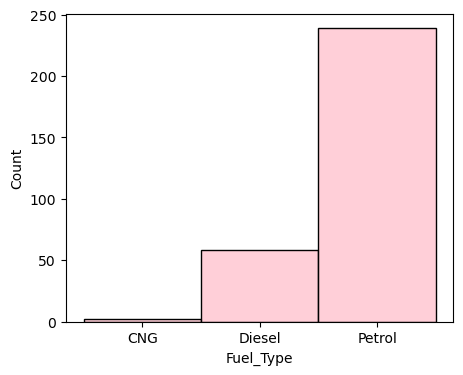

Petrol    79.933110
Diesel    19.397993
CNG        0.668896
Name: Fuel_Type, dtype: float64


In [166]:
print("Fuel_Type : ")
print(df["Fuel_Type"].value_counts())

plt.figure(figsize=(5,4))
sns.histplot(x=df["Fuel_Type"],color="Pink")
plt.xlabel("Fuel_Type",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.yticks(range(0,300,50))
plt.show()

print(df["Fuel_Type"].value_counts(normalize=True)*100)

In [ ]:
The above observations shows us that around 79.9% vehicle sold, are Petrol vehicle.

Seller_Type : 
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64


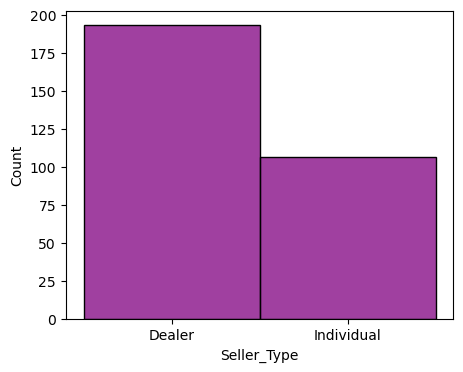

Dealer        64.548495
Individual    35.451505
Name: Seller_Type, dtype: float64


In [167]:
print("Seller_Type : ")
print(df["Seller_Type"].value_counts())

plt.figure(figsize=(5,4))
sns.histplot(x=df["Seller_Type"],color="Purple")
plt.xlabel("Seller_Type",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

print(df["Seller_Type"].value_counts(normalize=True)*100)

In [ ]:
From above observations it is pretty clear that maximum vehicles (around 64.5%) are being sold by Dealer and rest 
are being sold by their actual owners.

In [ ]:
#  Looking for number of vehicles according to their Gear transmission.

Transmission : 
Manual       260
Automatic     39
Name: Transmission, dtype: int64


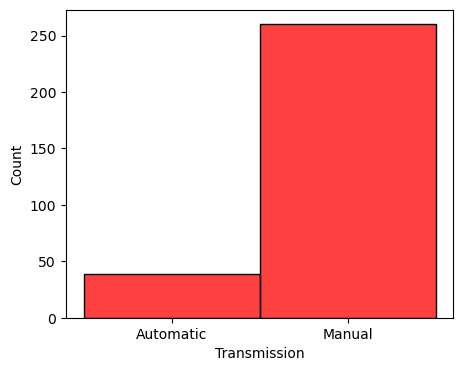

Manual       86.956522
Automatic    13.043478
Name: Transmission, dtype: float64


In [168]:
print("Transmission : ")
print(df["Transmission"].value_counts())

plt.figure(figsize=(5,4))
sns.histplot(x=df["Transmission"],color="red")
plt.xlabel("Transmission",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

print(df["Transmission"].value_counts(normalize=True)*100)

In [ ]:
The above observation shows us that 84.9% vehicles being sold have manual transmission system.

In [ ]:
# * Now looking at the distribution of data according to number of owners a particular vehicle had.

Owner : 

One_owner     288
Two_owner      10
Four_owner      1
Name: Owner, dtype: int64


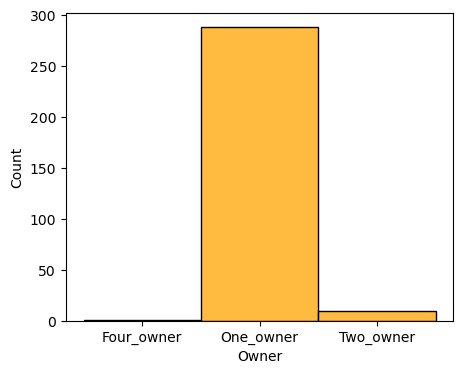

In terms of percentage : 

One_owner     96.321070
Two_owner      3.344482
Four_owner     0.334448
Name: Owner, dtype: float64


In [169]:
print("Owner : \n")
print(df["Owner"].value_counts())

plt.figure(figsize=(5,4))
sns.histplot(x=df["Owner"],color="Orange")
plt.xticks()
plt.xlabel("Owner",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

print("In terms of percentage : \n")
print(df["Owner"].value_counts(normalize=True)*100)

In [ ]:
From above we can see that around 96% vehicles had only one owner.

In [ ]:
    . Now looking at the distribution of data in "Year","Selling Price" and "KMs_Drive" columns and drawing conclusions from it.



* From below we can see that maximum vehicle being sold are from 2015 to 2017. 



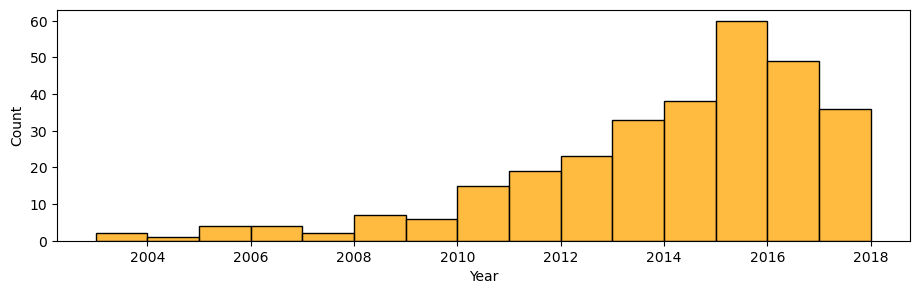



* From below we can see that maximum old vehicles have selling price upto 5 lakh. There are also some
    vehicles, whose selling price is around 35Lakhs




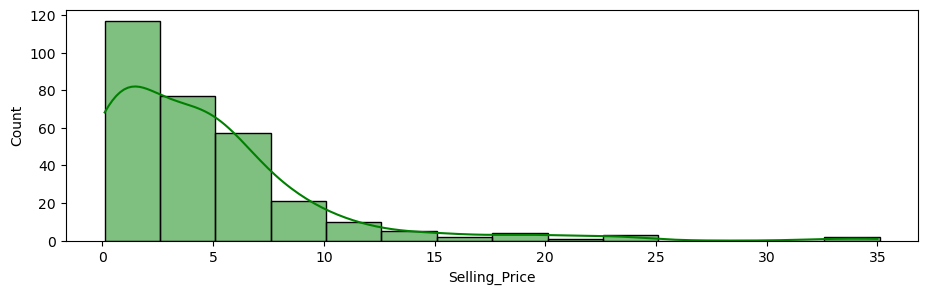


* From following visualization we can see that max old vehicles have travelling distance less than 10000.



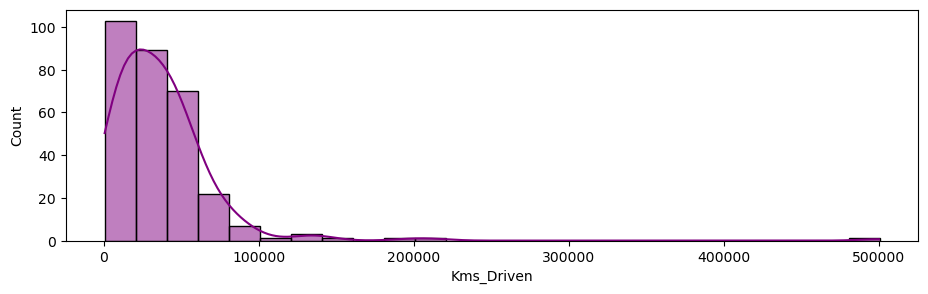

In [172]:
print("""\n\n* From below we can see that maximum vehicle being sold are from 2015 to 2017. \n""")

plt.figure(figsize=(11,3))
sns.histplot(x=df["Year"],bins=16,binwidth=1,color="Orange")
plt.show()


print("""\n\n* From below we can see that maximum old vehicles have selling price upto 5 lakh. There are also some
    vehicles, whose selling price is around 35Lakhs\n\n""")

plt.figure(figsize=(11,3))
sns.histplot(x=df["Selling_Price"],bins=15,binwidth=2.5,kde=True,color="green")
plt.show()


print("""\n* From following visualization we can see that max old vehicles have travelling distance less than 10000.\n""")
plt.figure(figsize=(11,3))
sns.histplot(x=df["Kms_Driven"],kde=True,binwidth=20000,color="purple")
plt.show()

# * Bivariate Analysis -

  Bivariate analysis is a analysis technique that involves examining the distribution of a Two variable.

In [ ]:
* Looking for car prices according to their manufacturing year.

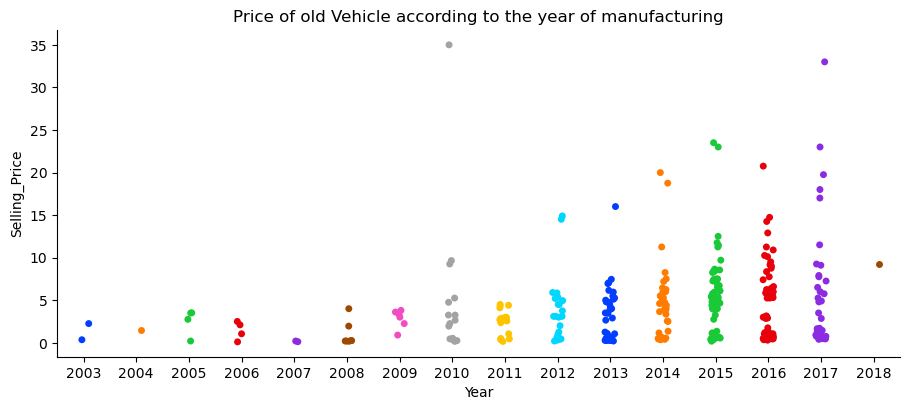

Number of vehicle manufactured each year :


2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [173]:
sns.catplot(data=df,x="Year",y="Selling_Price",height=4,aspect=2.3,palette="bright")
plt.title("Price of old Vehicle according to the year of manufacturing")
plt.show()

print("Number of vehicle manufactured each year :")
df["Year"].value_counts()

In [ ]:
Conclustions from above visualization :
    1. There are 60 old vehicles whose manufacturing year is 2015 and are being sold at price less than 
        15 lakh
    2. From 2010 there is one old vehicle whose price is around 35 lakh.

In [ ]:
  
    
    
    . Now we will compare the selling price of old vehicle and New vehicle with its fuel type.

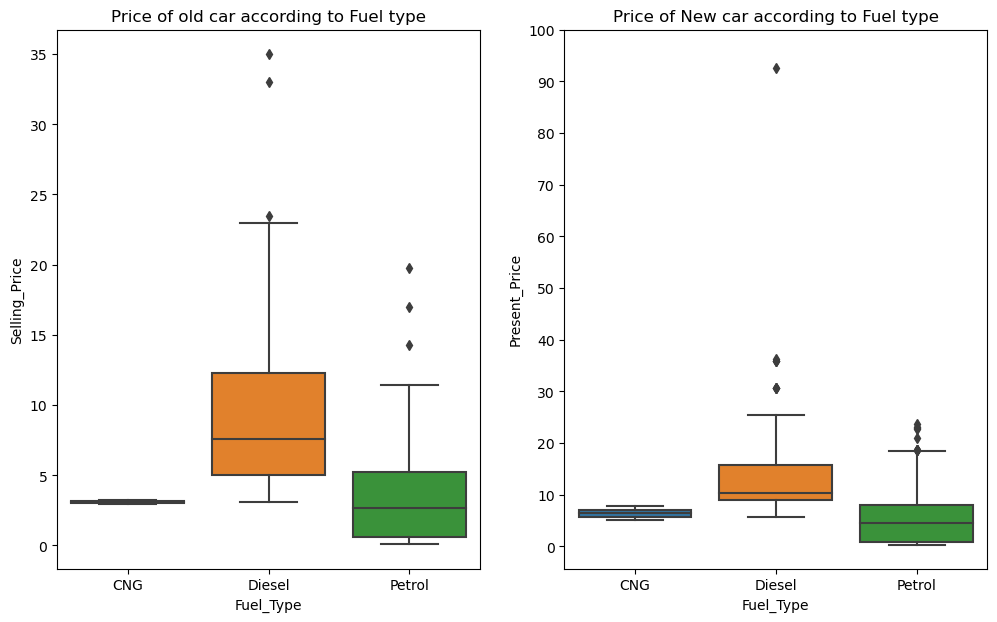

In [174]:
fig,ax = plt.subplots(1,2,figsize=(12,7))

plt.subplot(1,2,1)
sns.boxplot(data=df,x="Fuel_Type",y="Selling_Price")
plt.title("Price of old car according to Fuel type")

plt.subplot(1,2,2)
sns.boxplot(data=df,x="Fuel_Type",y="Present_Price")
plt.title("Price of New car according to Fuel type")
plt.yticks(range(0,110,10))
plt.show()

In [ ]:
From here we can draw conclusion that maximum old Diesel cars costs from 5 to 12 lakhs whereas same new Diesel cars
will costs from 5 to 25 lakhs. In case of Petrol maximum old car and bikes costs less than 5 lakhs whereas same new 
vehicles will cost between 5 to 20 lakhs.

In [ ]:
    
    
    . Looking at the price of old car on the basis of number of owner it had.

Text(0.5, 1.0, 'Price of old car according to owner type')

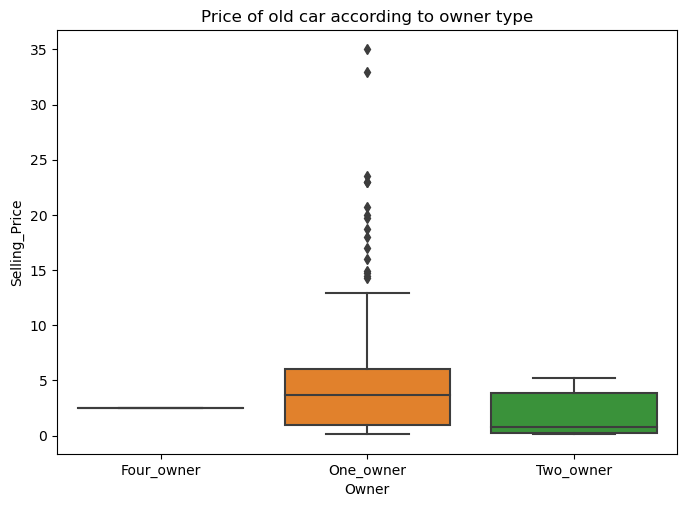

In [175]:
plt.figure(figsize=(8,5.5))
sns.boxplot(data=df,x="Owner",y="Selling_Price")
plt.title("Price of old car according to owner type")

In [ ]:
From above visualization we can say that vehicle with one owner is having maximum price and vehicle with four owners
has price around 2 to 3 lakh.

In [ ]:


.
Now looking at the relation of 'Selling Price' with 'KM Traveled' with respect to 'Fuel' it is using.

Text(0.5, 1.0, 'Price of old car according to Number of KMs traveled and fuel type')

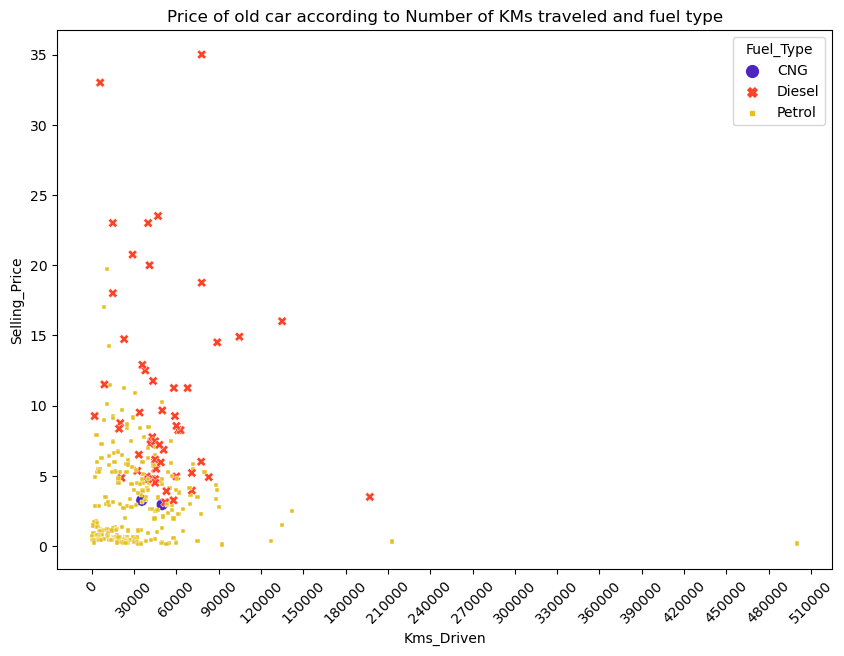

In [176]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x="Kms_Driven",y="Selling_Price",hue="Fuel_Type",style="Fuel_Type",size="Fuel_Type",palette="CMRmap")
plt.xticks(range(0,520000,30000),rotation=45)
plt.title("Price of old car according to Number of KMs traveled and fuel type")

In [ ]:
From above we can draw conclusion that -
    1. Most of the 'Petrol' vehicles have traveled less than 60000 KMs and costs mostly less than 10 Lakhs. 
    2. Most of the 'Diesel' vehicles have also traveled lss than 60000 KMs and costs between 5 Lakh to 25 Lakh.x

In [ ]:

Now we will compare the prices of old vehicles and the same new vehicles. Here we are trying to find out how much difference there is in the cost of the same and old vehicles.

Text(0.5, 1.0, 'Price of old car according to Number of KMs traveled and Transmission')

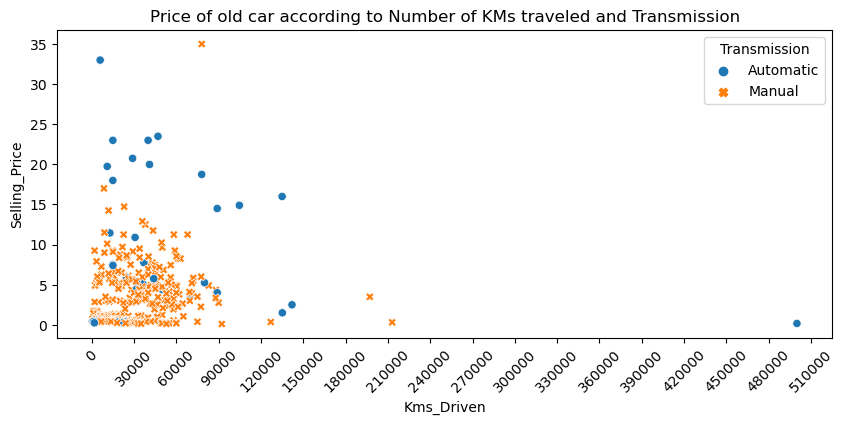

In [177]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x="Kms_Driven",y="Selling_Price",hue="Transmission",style="Transmission")
plt.xticks(range(0,520000,30000),rotation=45)
plt.title("Price of old car according to Number of KMs traveled and Transmission")

# Preprocessing


Data preprocessing is the process of preparing data for machine learning. It is a critical step in the machine learning process, as it can significantly improve the performance of the model.

The steps involved in data preprocessing can vary depending on the specific problem and the data, but some common steps include:

  1)Data transformation :
A common data transformation task is to normalize the data. This involves scaling the data so that all of the features have a similar range of values. Another common data transformation task is to scale the data. This involves converting the data into a range of values that is suitable for the machine learning algorithm.

  2)Feature selection :
A common feature selection task is to select the features that are most relevant to the problem. This can be done by using statistical methods, such as correlation analysis or principal component analysis.

  3)Data sampling :
A common data sampling task is to subdivide the data into training and test sets. The training set is used to train the model, and the test set is used to evaluate the performance of the model.

The specific steps involved in data preprocessing will depend on the specific problem and the data. However, by following these general steps, you can improve the performance of your machine learning models.

Here are some of the benefits of data preprocessing:

It can improve the accuracy of the model.
It can reduce the training time of the model.
It can improve the interpretability of the model.
It can prevent overfitting.

In [178]:
df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,One_owner
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,One_owner
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,One_owner
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,One_owner
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,One_owner


In [179]:
df.shape

(299, 8)

In [ ]:
Here we can understand that rather than using year as a feature , we can use difference of car manufacturing year with present year i.e. 2023 and use that difference as a feature for our prediction.

In [180]:
df["Number_of_years_old"] = 2021 - df["Year"]
df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,One_owner,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,One_owner,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,One_owner,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,One_owner,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,One_owner,7


In [ ]:
Now after calculating the difference of years, we will drop the column having values in the form of year.

In [182]:
del df["Year"]

In [183]:
df.head(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,One_owner,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,One_owner,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,One_owner,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,One_owner,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,One_owner,7


In [184]:
col_to_transform = ["Selling_Price","Present_Price","Kms_Driven","Number_of_years_old"]

print(df[col_to_transform].skew())

Selling_Price          2.536522
Present_Price          4.186894
Kms_Driven             6.418134
Number_of_years_old    1.236876
dtype: float64


In [ ]:
From above it is evident that all of the above columns have skewness in them.



 .So we will now try to reduce the skewness in the data. So the method used to reduce the skewness is transformation.
    
* Transformation :
There are a number of transformations that can be used to reduce skewness. The most common transformations are:

* Logarithm transformation :
This transformation is often used to reduce positive skewness. It works by taking the logarithm of each data point. This has the effect of stretching out the distribution, which can reduce the skewness.

* Square root transformation :
This transformation is often used to reduce right skewness. It works by taking the square root of each data point. This has the effect of compressing the distribution, which can reduce the skewness.

* Cube root transformation :
This transformation is often used to reduce right skewness. It works by taking the cube root of each data point. This has the effect of compressing the distribution, which can reduce the skewness.

* Reciprocal transformation :
This transformation is often used to reduce left skewness. It works by taking the reciprocal of each data point. This has the effect of stretching out the distribution, which can reduce the skewness.

* Box-Cox transformation :
This transformation is a more general transformation that can be used to reduce skewness for both positive and negative skewness. It works by fitting a power function to the data and then taking the power of each data point to that function.

In [ ]:
.
.
.Here we will use Cube root transformation to reduce the skewness present in columns.

0.2826338282139435


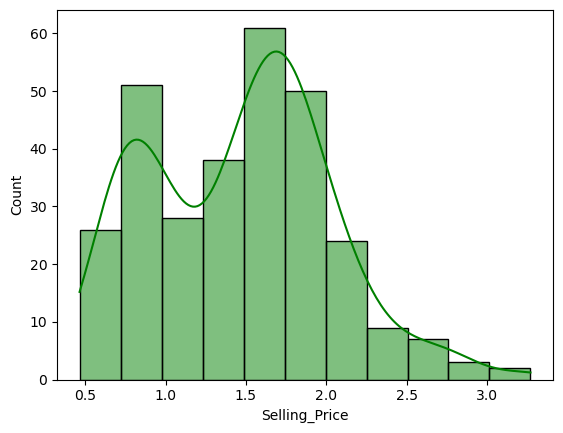

In [185]:
df["Selling_Price"] = np.cbrt(df["Selling_Price"])

sns.histplot(x=df["Selling_Price"],kde=True,color="green")
print(df["Selling_Price"].skew())

0.33905273923063667


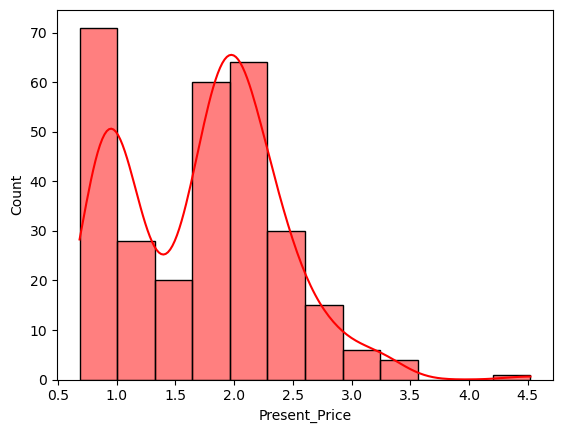

In [186]:
df["Present_Price"] = np.cbrt(df["Present_Price"])

sns.histplot(x=df["Present_Price"],kde=True,color="red")
print(df["Present_Price"].skew())

0.3623910581635339


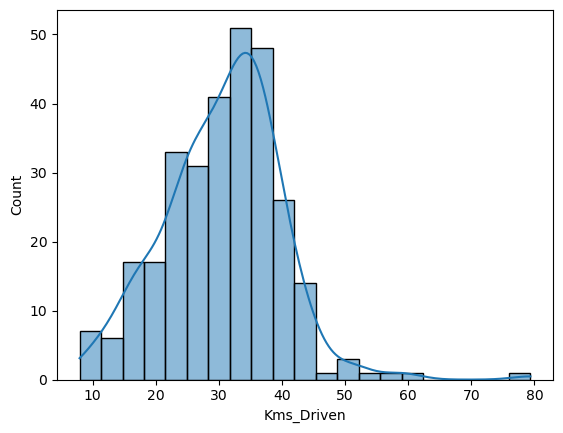

In [187]:
df["Kms_Driven"] = np.cbrt(df["Kms_Driven"])

sns.histplot(x=df["Kms_Driven"],kde=True)
print(df["Kms_Driven"].skew())

0.6459235871270708


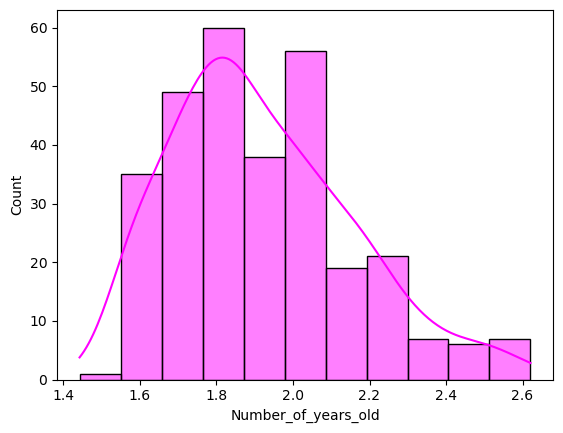

In [188]:
df["Number_of_years_old"] = np.cbrt(df["Number_of_years_old"])

sns.histplot(x=df["Number_of_years_old"],kde=True,color="magenta")
print(df["Number_of_years_old"].skew())

#   Handelling categorical columns :
    
Handling categorical columns is an important aspect of machine learning. Categorical data is data that can be divided into categories, such as gender, color, or type of vehicle1. There are two types of categorical data: nominal and ordinal1.

There are a number of ways to handle categorical columns in machine learning. Some of the most common methods include:

   Label encoding :
This is the simplest method of handling categorical columns. It involves assigning a unique integer to each category. For example, if the categorical column has three categories, then the categories could be assigned the integers 0, 1, and 2.

   One-hot encoding :
This is a more complex method of handling categorical columns. It involves creating a new binary column for each category. The new column will be 1 if the data point belongs to the category and 0 if it does not. For example, if the categorical column has three categories, then three new binary columns will be created.

   Frequency encoding :
This method involves creating a new column that represents the frequency of each category in the data set. For example, if the categorical column has three categories and the first category appears 50% of the time, then the new column will have the value 0.5 for the first category.

   Target encoding :
This method involves creating a new column that represents the target value for each category. For example, if the categorical column is the country of origin and the target value is the price of a product, then the new column will have the average price of the product for each country.

The best method to use will depend on the specific data set and the machine learning algorithm that is being used. In general, it is a good idea to try a few different methods and see which one works best.

To use any of these methods we have to keep somethings in mind that -

.The number of categories in a categorical column can affect the method that is used to handle it. For example, if the categorical column has a small number of categories, then label encoding may be sufficient. However, if the categorical column has a large number of categories, then one-hot encoding may be a better option.

.The order of the categories in a categorical column can affect the results of the machine learning algorithm. It is important to order the categories in a way that is meaningful for the machine learning algorithm.

The missing values in a categorical column can affect the results of the machine learning algorithm. It is important to deal with missing values in a way that is consistent with the method that is being used to handle the categorical column.

In [189]:
df.nunique()

Selling_Price          156
Present_Price          147
Kms_Driven             206
Fuel_Type                3
Seller_Type              2
Transmission             2
Owner                    3
Number_of_years_old     16
dtype: int64

In [ ]:



As we can see from here, there are some columns that have two categories, so we will encode them using the label encoder. This is the simplest method of handling categorical columns. It involves assigning a unique integer to each category.

In [190]:
col_to_label_encode = ["Seller_Type","Transmission"]

for col in col_to_label_encode:
    label=LabelEncoder()
    label.fit(df[col])
    df[col]=label.transform(df[col])

In [ ]:



.There are some columns that have more than two categories, so we will encode them using one hot encoding. This is a more complex method of handling categorical columns. It involves creating a new binary column for each category. The new column will be 1 if the data point belongs to the category and 0 if it does not.

In [191]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years_old
0,1.496287,1.774750,30.000000,Petrol,0,1,One_owner,1.912931
1,1.680988,2.120880,35.033981,Diesel,0,1,One_owner,2.000000
2,1.935438,2.143608,19.037783,Petrol,0,1,One_owner,1.587401
3,1.417800,1.607001,17.324782,Petrol,0,1,One_owner,2.154435
4,1.663103,1.901015,34.883970,Diesel,0,1,One_owner,1.912931


In [192]:
df.shape

(299, 8)

In [193]:
col_to_oneencode = ["Fuel_Type"]

for col in col_to_oneencode:
    ohe=OneHotEncoder(sparse=False)
    matrix=ohe.fit(df[[col]])
    matrix=ohe.transform(df[[col]])
    matrix=pd.DataFrame(matrix,columns=["Fuel_"+str(val) for val in ohe.categories_[0]])
    df=pd.concat([df,matrix],axis=1)

In [ ]:
   Now we will delete the orignal columns, still carrying uncoded data

In [194]:
del df["Fuel_Type"]

In [ ]:
Here we will replace the "One_owner" with 1, "Two_owner" with 2 and "Four_owner" with 4. So that we can use tham in proper way.

In [195]:
df.shape

(299, 10)

In [196]:
df["Owner"].replace(["One_owner","Two_owner","Four_owner"],[1,2,4],inplace=True)

In [ ]:

Now we will divide the data into two groups. Independent features and dependent features Independent features are known features (X) that are used for prediction, and dependent features are known as targets (Y). .

In [197]:
df.head(5)

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Number_of_years_old,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,1.496287,1.774750,30.000000,0,1,1,1.912931,0.0,0.0,1.0
1,1.680988,2.120880,35.033981,0,1,1,2.000000,0.0,1.0,0.0
2,1.935438,2.143608,19.037783,0,1,1,1.587401,0.0,0.0,1.0
3,1.417800,1.607001,17.324782,0,1,1,2.154435,0.0,0.0,1.0
4,1.663103,1.901015,34.883970,0,1,1,1.912931,0.0,1.0,0.0


In [198]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

print("Shape of X : ",X.shape)
print("Shape of Y : ",Y.shape)

Shape of X :  (299, 9)
Shape of Y :  (299,)


# Feature selection :

Feature selection is a process in machine learning and statistics where you choose a subset of the most relevant and informative features (also known as variables or attributes) from a larger set of features. The goal of feature selection is to improve the model's performance, reduce overfitting, decrease computational complexity, and enhance interpretability by focusing on the most important features while discarding or ignoring irrelevant or redundant ones.

Feature selection methods can be broadly categorized into three groups:

Filter Methods:
Filter methods involve evaluating the importance of each feature using statistical metrics or heuristics. These methods are independent of the machine learning algorithm you intend to use and are often applied before building the model. Common filter methods include:

Correlation-based methods:
Features with high correlation to the target variable are considered important.
Variance thresholding:
Features with low variance may not provide much information and can be removed.
Mutual information:
Measures the mutual dependence between a feature and the target.
Chi-squared test:
Evaluates the dependency between categorical features and the target.
Information Gain:
Measures how much a feature reduces the uncertainty of the target.
ANOVA (Analysis of Variance):
Tests the variance between groups to determine feature importance.
Wrapper Methods:
Wrapper methods select features by training and evaluating the model on different subsets of features. These methods are more computationally intensive as they involve repeatedly training the model, but they can provide a more accurate evaluation of feature importance for a specific algorithm. Common wrapper methods include:

Forward Selection:
Starts with an empty set of features and adds one feature at a time that improves model performance the most.
Backward Elimination:
Starts with all features and removes the least important one at each iteration.
Recursive Feature Elimination (RFE):
Recursively removes the least important feature until a desired number of features is reached.
Embedded Methods:
Embedded methods incorporate feature selection into the model training process. They combine the advantages of both filter and wrapper methods and are usually specific to a particular machine learning algorithm. Common embedded methods include:

Lasso (L1 regularization):
Adds a penalty term to the loss function, encouraging the model to set coefficients of less important features to zero.
Decision Tree Pruning:
Decision trees can be pruned to remove less important branches, resulting in feature selection.
Regularized Regression:
Techniques like Ridge and Elastic Net regression can shrink coefficients of less important features.
Feature Importance from Tree-based Models:
Algorithms like Random Forest and Gradient Boosting provide feature importance scores that can guide feature selection.
. .

Lets use correlation as the method for feature selection.

Correlation-based feature selection (CFS) - :
Correlation-based feature selection (CFS) is a filter-based feature selection method that uses the correlation between features to select the most relevant features for a machine learning model. The basic idea behind CFS is that the best features are those that are most correlated with the target variable and least correlated with each other.

There are two main steps involved in CFS:

Calculate the correlation between all pairs of features.
Select the features with the highest correlation with the target variable and the lowest correlation with each other.
The correlation coefficient is a measure of the linear relationship between two variables. It can be positive or negative, and it can range from -1 to 1. A positive correlation indicates that the two variables tend to move in the same direction, while a negative correlation indicates that they tend to move in opposite directions. A correlation of 0 indicates that there is no linear relationship between the two variables.

In CFS, the correlation coefficient is used to measure the relevance of each feature to the target variable. The features with the highest correlation coefficients are considered to be the most relevant.

" However, it is also important to consider the correlation between the features themselves. Features that are highly correlated with each other are redundant, and they can actually hurt the performance of the machine learning model."




So here we are trying to find those features that are highly correlated to each other.



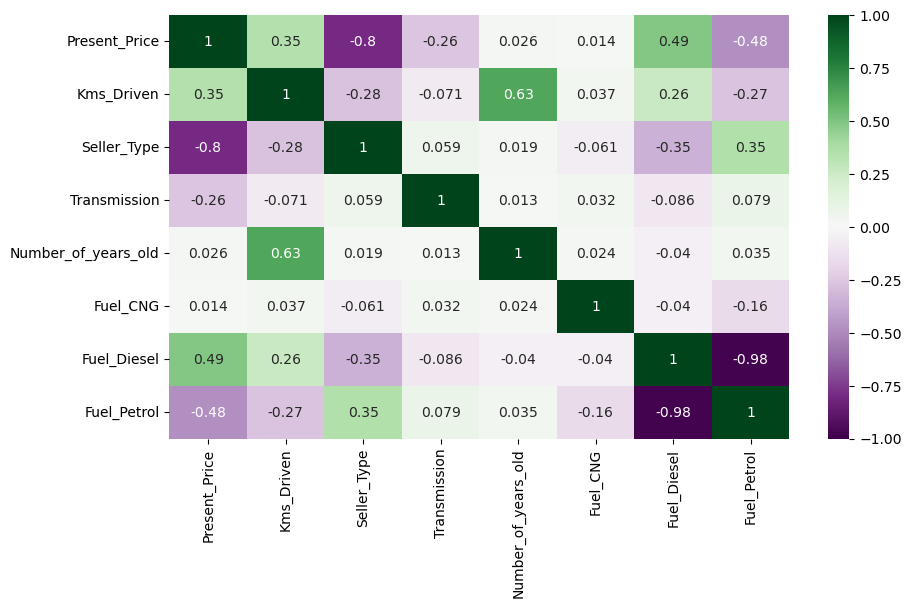

In [199]:
colormap = plt.cm.PRGn
plt.figure(figsize=(10,5.5))
sns.heatmap(X.corr(),annot=True,vmax=1,vmin=-1,cmap=colormap)
plt.show()

In [ ]:
As it is evident from the above, there are some features that are highly correlated to each other. If there is a slight change in the first feature, it can be seen in other features as well. The change could be positive or negative based on the nature of the correlation.

Now we will define a threshold value of correlation above which, if any absolute value of correlation coefficient is present, we will not be using that column as a feature in model building.

In [200]:
corr_matrix = X.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.85)]
print("Columns of to drop : ",to_drop)

X = X.drop(X[to_drop],axis=1)
print("Independent Features are : ",X.columns)

Columns of to drop :  ['Fuel_Petrol']
Independent Features are :  Index(['Present_Price', 'Kms_Driven', 'Seller_Type', 'Transmission', 'Owner',
       'Number_of_years_old', 'Fuel_CNG', 'Fuel_Diesel'],
      dtype='object')


# Scalling the Data :
    
Scaling data is the process of transforming the values of features in a dataset so that they have a similar range of values. This is important for machine learning algorithms that are sensitive to the scale of the features, such as linear regression and k-nearest neighbors.

There are two main types of data scaling:

 Normalization:
This involves transforming the values of each feature so that they have a range of 0 to 1. This is done by subtracting the minimum value of the feature from each value and then dividing by the difference between the maximum and minimum values. To perform normalization we use MinMaxScaler.
 Standardization:
This involves transforming the values of each feature so that they have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature from each value and then dividing by the standard deviation. To perform standardization we use StandardScaler.

In [ ]:
[] scaler = StandardScaler()
   Xscaled = scaler.fit_transform(X)
   

In [ ]:
Model Building

In [ ]:
Train test split :
    
    Train test split is a technique for evaluating the performance of a machine learning algorithm. It is used to prevent the model from overfitting to the training data. Overfitting occurs when the model learns the training data too well and is unable to generalize to new data.

    The train test split involves splitting the data into two sets: the training set and the test set. The training set is used to train the model, and the test set is used to test the model. The model is not allowed to see the test set during training.

    The size of the training set and the test set can vary depending on the dataset and the machine learning algorithm. A good rule of thumb is to use 80% of the data for the training set and 20% of the data for the test set.

In [201]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=10)

print("X train shape : ",Xtrain.shape)
print("X test shape : ",Xtest.shape)
print("Y train shape : ",Ytrain.shape)
print("Y test shape : ",Ytest.shape)

X train shape :  (239, 8)
X test shape :  (60, 8)
Y train shape :  (239,)
Y test shape :  (60,)


In [ ]:
Double-click (or enter) to edit

In [86]:
MSE_ = []
RMSE_ = []
MAE_ = []
CV = []
R2_score_test_ = []

In [ ]:
[]

In [88]:
decision_tree = DecisionTreeRegressor(random_state=10)
decision_tree.fit(Xtrain,Ytrain)

DecisionTreeRegressor(random_state=10)

In [89]:
cross_val = cross_val_score(decision_tree,Xtrain,Ytrain,cv=5)
cross_val = cross_val.mean()
MSE = mean_squared_error(Ytest,decision_tree.predict(Xtest))
RMSE = np.sqrt(mean_squared_error(Ytest,decision_tree.predict(Xtest)))
MAE = mean_absolute_error(Ytest,decision_tree.predict(Xtest))
R2_score_test = r2_score(Ytest,decision_tree.predict(Xtest))

In [90]:
print("Mean squared error in testing is : ",MSE)
print("Root Mean squared error in testing is : ",RMSE)
print("Mean absolute error in testing is : ",MAE)
print("CV score is : ",cross_val)
print("R2 score in testing is : ",R2_score_test)

MSE_.append(MSE)
RMSE_.append(RMSE)
MAE_.append(MAE)
CV.append(cross_val)
R2_score_test_.append(R2_score_test)

Mean squared error in testing is :  0.014501896684006024
Root Mean squared error in testing is :  0.12042382108206841
Mean absolute error in testing is :  0.08803216965519195
CV score is :  0.919274435168292
R2 score in testing is :  0.9522652862493366


In [ ]:
[]

In [91]:
gradient_boosting = GradientBoostingRegressor(random_state=10)
gradient_boosting.fit(Xtrain,Ytrain)

GradientBoostingRegressor(random_state=10)

In [92]:
cross_val = cross_val_score(gradient_boosting,Xtrain,Ytrain,cv=5)
cross_val = cross_val.mean()
MSE = mean_squared_error(Ytest,gradient_boosting.predict(Xtest))
RMSE = np.sqrt(mean_squared_error(Ytest,gradient_boosting.predict(Xtest)))
MAE = mean_absolute_error(Ytest,gradient_boosting.predict(Xtest))
R2_score_test = r2_score(Ytest,gradient_boosting.predict(Xtest))


print("Mean squared error in testing is : ",MSE)
print("Root Mean squared error in testing is : ",RMSE)
print("Mean absolute error in testing is : ",MAE)
print("CV score is : ",cross_val)
print("R2 score in testing is : ",R2_score_test)

MSE_.append(MSE)
RMSE_.append(RMSE)
MAE_.append(MAE)
CV.append(cross_val)
R2_score_test_.append(R2_score_test)

Mean squared error in testing is :  0.007077234574742642
Root Mean squared error in testing is :  0.08412630132570101
Mean absolute error in testing is :  0.06022354372519566
CV score is :  0.9625315651868072
R2 score in testing is :  0.9767044426027234


In [ ]:
[]

In [93]:
forest_model = RandomForestRegressor(random_state=10)
forest_model.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=10)

In [94]:
cross_val = cross_val_score(forest_model,Xtrain,Ytrain,cv=5)
cross_val = cross_val.mean()
MSE = mean_squared_error(Ytest,forest_model.predict(Xtest))
RMSE = np.sqrt(mean_squared_error(Ytest,forest_model.predict(Xtest)))
MAE = mean_absolute_error(Ytest,forest_model.predict(Xtest))
R2_score_test = r2_score(Ytest,forest_model.predict(Xtest))



print("Mean squared error in testing is : ",MSE)
print("Root Mean squared error in testing is : ",RMSE)
print("Mean absolute error in testing is : ",MAE)
print("CV score is : ",cross_val)
print("R2 score in testing is : ",R2_score_test)

MSE_.append(MSE)
RMSE_.append(RMSE)
MAE_.append(MAE)
CV.append(cross_val)
R2_score_test_.append(R2_score_test)

Mean squared error in testing is :  0.00884498588803551
Root Mean squared error in testing is :  0.09404778513094027
Mean absolute error in testing is :  0.0668991732326499
CV score is :  0.953622572088373
R2 score in testing is :  0.9708856793911871


# Comparing the Metrics of all models

In [95]:
Model = ["DecisionTreeRegressor","GradientBoostingRegressor","RandomForestRegressor"]
results=pd.DataFrame({
                        'Model': Model,
                        'CV score': CV,
                        'R2 score test': R2_score_test_,
                        'MSE':MSE_,
                        'RMSE':RMSE_,
                        'MAE':MAE_,})
results.head()

,Model,CV score,R2 score test,MSE,RMSE,MAE
0,DecisionTreeRegressor,0.919274,0.952265,0.014502,0.120424,0.088032
1,GradientBoostingRegressor,0.962532,0.976704,0.007077,0.084126,0.060224
2,RandomForestRegressor,0.953623,0.970886,0.008845,0.094048,0.066899


In [ ]:
Analysis -:

1) From above it is clear that The RandomForestRegressor and GradientBoostingRegressor models have a higher CV score, R2 score test, and lower MSE, RMSE, and MAE than the DecisionTreeRegressor model. This means that the RandomForestRegressor and GradientBoostingRegressor models are better at predicting car prices than the DecisionTreeRegressor model.

2) The GradientBoostingRegressor model has the highest CV score, R2 score test, and lowest MSE, RMSE, and MAE. This means that the GradientBoostingRegressor model is the best model for predicting car prices.